In [12]:
import numpy as np
import pandas as pd

# generate a bunch of random numbers between 50.0 and 80.0
NUMBER_OF_DATA_POINTS = 25
top_1_representations = np.random.uniform(50.0, 80.0, NUMBER_OF_DATA_POINTS)

# generate a bunch of random numbers between 100 and 1024
ranks = np.random.randint(100, 1024, NUMBER_OF_DATA_POINTS)

architectures = ["VicReg", "SimCLR", "Tobias", "John W."]
datasets = ["CIFAR-10", "CIFAR-100", "ImageNet"]

# Flatten the data list
data = [
    (
        top_1_representations[i % NUMBER_OF_DATA_POINTS],
        ranks[i % NUMBER_OF_DATA_POINTS],
        architectures[i % 4],
        dataset,
    )
    for dataset in datasets
    for i in range(NUMBER_OF_DATA_POINTS)
]

df = pd.DataFrame(
    data, columns=["Top-1 Representation", "Rank", "Architecture", "Dataset"]
)

/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/linusostlund/anaconda3/envs/pytorch_tutorials/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureW

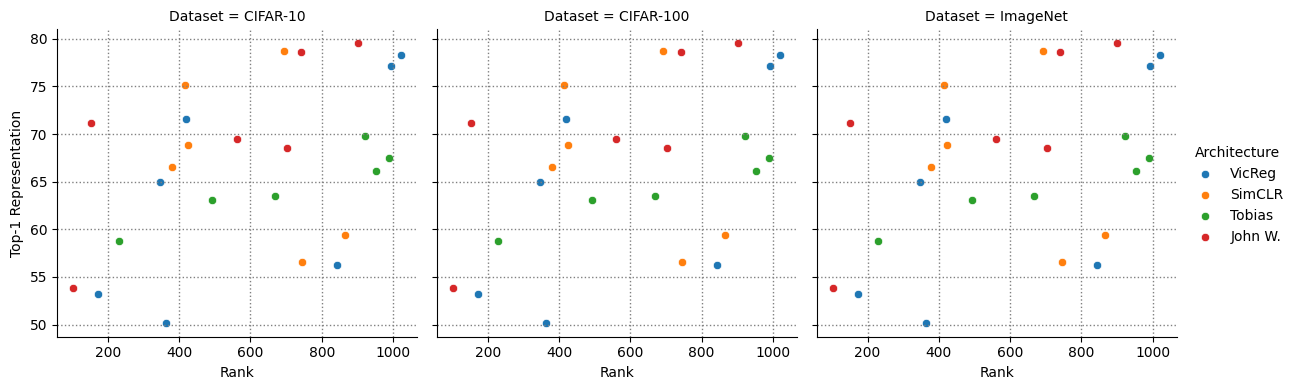

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_rank_representation(df: pd.DataFrame) -> None:
    """
    Plot the rank vs. representation for each dataset, with architecture as a hue.
    @param df: The dataframe containing the data to plot.
    Data has to be in the format:
    | Top-1 Representation | Rank | Architecture | Dataset |
    |----------------------|------|--------------|---------|
    | float                | int  | String       | String  |
    return: None, but shows the plot :-)
    """

    g = sns.FacetGrid(
        df, col="Dataset", hue="Architecture", col_wrap=3, height=4, aspect=1
    )

    # Map a scatter plot to each Facet
    g.map(sns.scatterplot, "Rank", "Top-1 Representation")

    g.map(plt.grid, linestyle=":", linewidth=1, color="gray")

    # Add a legend and grid to each plot
    g.add_legend()
    g.set_axis_labels("Rank", "Top-1 Representation")
    # g.add_gridspec(hspace=0.4, wspace=0.4)

    # Show the plots
    plt.show()


plot_rank_representation(df)